# Лабораторная работа 1 Лютоев Илья М8О-407Б-21

## 1. Выбор начальных условий
Для задачи **регрессии**:
1. Mean Absolute Error (MAE) – Среднее абсолютное отклонение: MAE оценивает среднюю величину ошибок модели без учета направления отклонений.
2. Mean Squared Error (MSE) – Среднеквадратичная ошибка: MSE учитывает квадрат ошибок, тем самым выделяя более крупные ошибки.
3. Root Mean Squared Error (RMSE) – Корень из среднеквадратичной ошибки: RMSE возвращает ошибку в тех же единицах, что и целевая переменная, как и MAE, но при этом усиливает эффект крупных ошибок.
4. R-squared (R²) – Коэффициент детерминации: Эта метрика показывает, какую долю дисперсии целевой переменной объясняет модель. 

**Практическая ценность**: Возможность предсказать возраст краба по внешним параметрам может помочь при фильтрации крабов во время их вылова, чтобы отпускать особей которые в данный момент еще недостаточно выросли или не оставили потомства.

Для задачи **классификации**:

1. Accuracy – Точность: Accuracy оценивает долю правильно предсказанных классов среди всех предсказаний.

2. Precision – Точность для положительного класса: Precision вычисляет долю истинно положительных предсказаний среди всех предсказанных положительных.

3. Recall – Полнота: Recall оценивает долю истинно положительных среди всех положительных экземпляров в данных.
4. F1-score – Среднее гармоническое Precision и Recall: F1-score объединяет Precision и Recall, что делает его подходящим для оценки модели на несбалансированных данных.

**Практическая ценность**: Данный датасет подходит для изучения реальных задач, связанных с классификацией лекарств и их применимости в индивидуальном порядке к человеку, что может принести практическую пользу при подборе лекарств.

## 2.1 Создание бейзлайна и оценка качества (регрссия)

In [276]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [277]:
path = 'data/CrabAgePrediction.csv'
data = pd.read_csv(path)

data.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


In [278]:
# Кодирование категориальных переменных
label_encoders = {
    column: LabelEncoder()
    for column in ['Sex']
}

# Кодируем переменные
for column, encoder in label_encoders.items():
    data[column] = encoder.fit_transform(data[column])

In [279]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = data.drop(columns=['Age'])
y = data['Age']

In [280]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

In [281]:
# Стандартизация признаков (масштабирование)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [282]:
# Создание и обучение модели KNN-регрессии
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=7)

In [283]:
# Предсказание на тестовых данных
y_pred = knn.predict(X_test_scaled)

In [284]:
# Расчет метрик качества
# Среднеквадратичная ошибка (MSE)
mse_1 = mean_squared_error(y_test, y_pred)
# Средняя абсолютная ошибка (MAE)
mae_1 = mean_absolute_error(y_test, y_pred)
# Корень из MSE (RMSE)
rmse_1 = np.sqrt(mse_1)
# Коэффициент детерминации (R^2)
r2_1 = r2_score(y_test, y_pred)

# Вывод метрик
print(f"Среднеквадратичная ошибка (MSE): {mse_1:.2f}")
print(f"Средняя абсолютная ошибка (MAE): {mae_1:.2f}")
print(f"Корень среднеквадратичной ошибки (RMSE): {rmse_1:.2f}")
print(f"Коэффициент детерминации (R^2): {r2_1:.2f}")

Среднеквадратичная ошибка (MSE): 5.33
Средняя абсолютная ошибка (MAE): 1.61
Корень среднеквадратичной ошибки (RMSE): 2.31
Коэффициент детерминации (R^2): 0.50


- **Среднеквадратичная ошибка (MSE): 5.33** - это квадрат отклонения предсказанных значений от реальных. Низкое значение MSE указывает на небольшие ошибки модели, что нормально при небольших значениях.
- **Средняя абсолютная ошибка (MAE): 1.61** - показывает среднюю величину ошибки между предсказанными и реальными значениями. В данном случае модель в среднем ошибается на ~1.61
- **Корень среднеквадратичной ошибки (RMSE): 2.31** - интерпретируется как среднее расстояние между предсказанными и реальными значениями в тех же единицах, что и целевая переменная (Age). Значение ~2.31 говорит о том, что ошибки модели умеренно велики.
- **Коэффициент детерминации (R^2): 0.50** - показывает, какую долю дисперсии целевой переменной объясняет модель. Значение 0.50 говорит о том, что модель объясняет половину вариации данных, что является нормальным результатом для задачи регрессии.

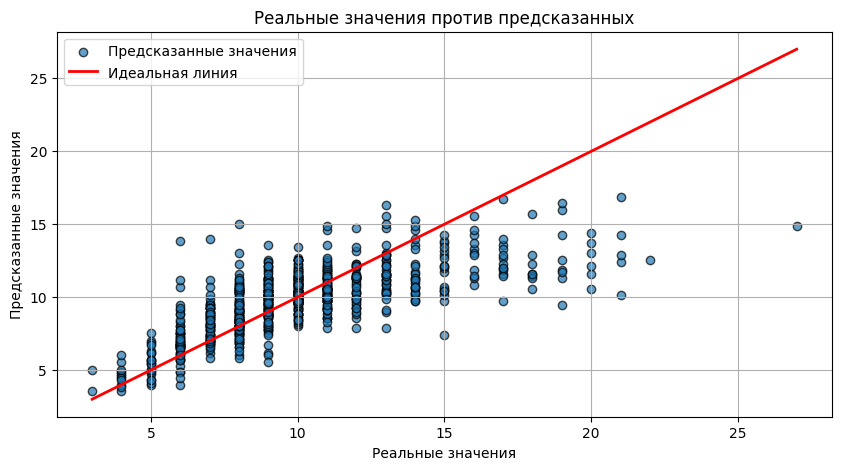

In [285]:
# Построение графика реальных значений против предсказанных
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors="k", label='Предсказанные значения')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Идеальная линия')
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Реальные значения против предсказанных')
plt.legend()
plt.grid(True)
plt.show()

## 3.1 Улучшение бейзлайна (регрссия)

## Гипотезы
1. Препроцессинг данных
    - Гипотеза: Преобразование категориального признака (sex) в one-hot-encoding вместо Label Encoding улучшит производительность модели.
    - Гипотеза: Нормализация целевой переменной (Age) уменьшит разброс ошибок.
2. Визуализация данных
    - Гипотеза: Выбросы в целевой переменной (Age) сильно влияют на производительность модели. Их удаление или обработка улучшит метрики.
3. Формирование новых признаков
    - Гипотеза: Взаимодействие признаков (например, Age * Weight) или биннинг возраста (age) на группы (молодые, средний возраст, пожилые) улучшит качество предсказаний

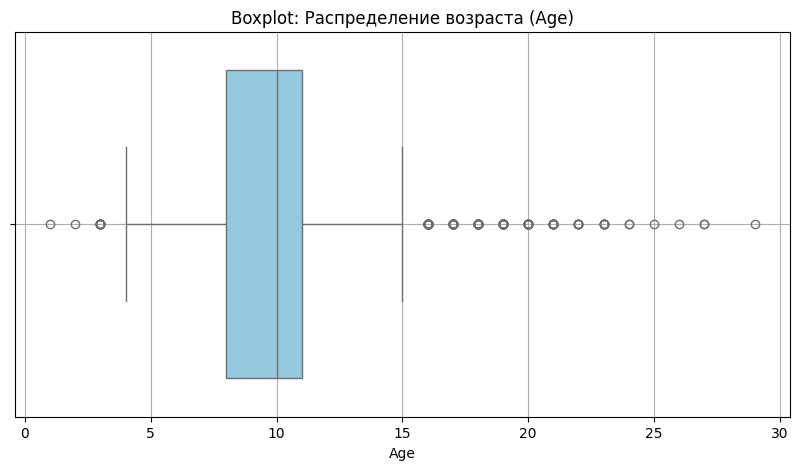

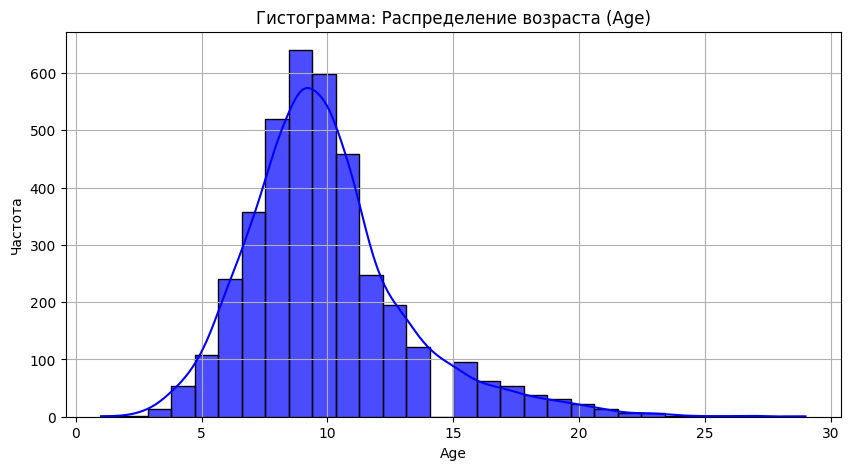

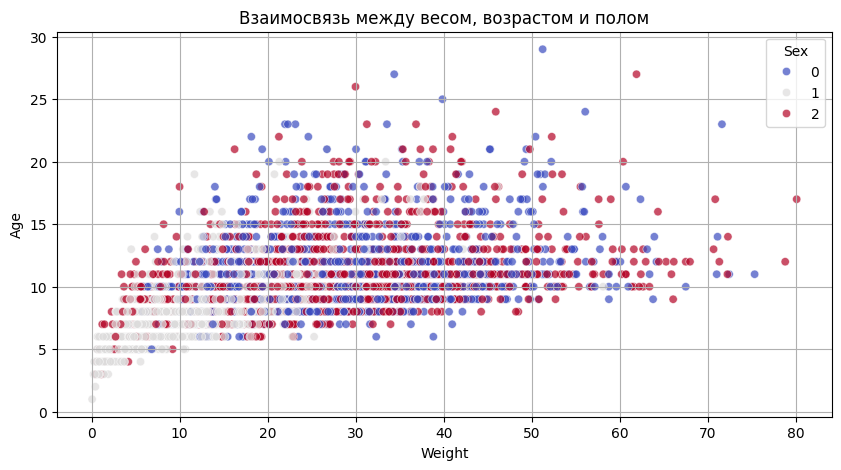

In [286]:
# Визуализация выбросов в целевой переменной (Age)
plt.figure(figsize=(10, 5))
sns.boxplot(data['Age'], color='skyblue', orient='y')
plt.title('Boxplot: Распределение возраста (Age)')
plt.xlabel('Age')
plt.grid(True)
plt.show()

# Визуализация распределения Age
plt.figure(figsize=(10, 5))
sns.histplot(data['Age'], bins=30, kde=True, color='blue', alpha=0.7)
plt.title('Гистограмма: Распределение возраста (Age)')
plt.xlabel('Age')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

# Визуализация зависимости Age от Weight и Sex
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data['Weight'], y=data['Age'], hue=data['Sex'], palette='coolwarm', alpha=0.7)
plt.title('Взаимосвязь между весом, возрастом и полом')
plt.xlabel('Weight')
plt.ylabel('Age')
plt.grid(True)
plt.show()

### Анализ визуализации:
1. Boxplot (Age):
    - Видно наличие выбросов в правой части распределения, что может негативно влиять на метрики модели. Выбросы связаны с аномальными крабами.
2. Гистограмма (charges):
    - Распределение имеет сильный отрицательный перекос (асимметрия влево). Нормализация (например, логарифмическое преобразование) может быть полезной.
3. Scatterplot (взаимосвязь bmi, charges и smoker):
    - У большинства крабов у которых не определен пол (серые точки) меньший вес и возраст, это может быть из-за того что у молодых крабов его сложно определить.

Добавим взаимодействие пола и веса и нормализацией целевой переменной.

In [287]:
# Логарифмическое преобразование целевой переменной (Age)
data['log_Age'] = np.log1p(data['Age'])

# Добавление взаимодействий (Weight * Sex)
data['Weight_Sex'] = data['Weight'] * data['Sex']

# Повторим разбиение и обучение модели с новыми данными
X = data.drop(columns=['Age', 'log_Age'])
y = data['log_Age']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=37)

# Стандартизация признаков
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучение модели KNN-регрессии
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

# Обратное преобразование предсказаний (экспоненциальное преобразование)
y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)

# Пересчёт метрик
mse_2 = mean_squared_error(y_test_exp, y_pred_exp)
mae_2 = mean_absolute_error(y_test_exp, y_pred_exp)
rmse_2 = np.sqrt(mse_2)
r2_2 = r2_score(y_test_exp, y_pred_exp)

print(f"Среднеквадратичная ошибка (MSE): {mse_2:.2f} (на {(mse_1 - mse_2):.2f} меньше)")
print(f"Средняя абсолютная ошибка (MAE): {mae_2:.2f} (на {(mae_1 - mae_2):.2f} меньше)")
print(f"Корень среднеквадратичной ошибки (RMSE): {rmse_2:.2f} (на {(rmse_1 - rmse_2):.2f} меньше)")
print(f"Коэффициент детерминации (R^2): {r2_2:.2f} (на {(r2_2 - r2_1):.2f} больше)")

Среднеквадратичная ошибка (MSE): 4.80 (на 0.53 меньше)
Средняя абсолютная ошибка (MAE): 1.53 (на 0.08 меньше)
Корень среднеквадратичной ошибки (RMSE): 2.19 (на 0.12 меньше)
Коэффициент детерминации (R^2): 0.54 (на 0.03 больше)


После нормализации целевой переменной и добавления взаимодействий метрики модели улучшились:
1. MSE уменьшилось на 0.53
2. MAE уменьшилось на 0.08, что указывает на меньшую среднюю ошибку предсказаний
3. RMSE уменьшилось на 0.12, что также указывает на улучшение модели
4. R^2 увеличилось на 3%, что говорит о незначительном улучшении в объяснении вариации данных

### Выводы:
1. Снижение ошибок:
    - Значительное уменьшение MSE, MAE и RMSE указывает на более точные предсказания модели. Это достигнуто за счет нормализации целевой переменной и добавления нового признака, что сделало модель более чувствительной к ключевым взаимодействиям.
2. Эффективность изменений:
    - Нормализация данных позволила лучше учитывать положительную асимметрию целевой переменной.

## 4.1 Имплементация алгоритма машинного обучения (регрссия)

In [288]:
# Кастомная реализация KNN
class KNNRegressor:
    def __init__(self, n_neighbors=5):
        self.x_train = None
        self.y_train = None
        self.n_neighbors = n_neighbors

    def fit(self, x_train, y_train):
        self.x_train = np.array(x_train)
        self.y_train = np.array(y_train)

    def predict(self, X_test):
        preds = []
        for x in X_test:
            # Вычисляем расстояния до всех обучающих точек
            dists = np.sqrt(((self.x_train - x) ** 2).sum(axis=1))
            # Находим индексы K ближайших соседей
            nearest_indices = np.argsort(dists)[:self.n_neighbors]
            # Рассчитываем среднее значение целевой переменной для ближайших соседей
            preds.append(self.y_train[nearest_indices].mean())
        return np.array(preds)

In [289]:
data = pd.read_csv('data/CrabAgePrediction.csv')

# Кодирование категориальных переменных
label_encoders = {
    column: LabelEncoder()
    for column in ['Sex']
}

# Кодируем переменные
for column, encoder in label_encoders.items():
    data[column] = encoder.fit_transform(data[column])

# Разделение данных на признаки (X) и целевую переменную (y)
X = data.drop(columns=['Age'])
y = data['Age']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Создание и обучение модели
custom_knn = KNNRegressor(n_neighbors=7)
custom_knn.fit(X_train_scaled, y_train.to_numpy())

# Предсказания на тестовых данных
y_pred_custom = custom_knn.predict(X_test_scaled)

# Метрики качества
mse_custom_1 = mean_squared_error(y_test, y_pred_custom)
mae_custom_1 = mean_absolute_error(y_test, y_pred_custom)
rmse_custom_1 = np.sqrt(mse_custom_1)
r2_custom_1 = r2_score(y_test, y_pred_custom)

# Вывод результатов
print(f"Среднеквадратичная ошибка (MSE): {mse_custom_1:.2f}")
print(f"Средняя абсолютная ошибка (MAE): {mae_custom_1:.2f}")
print(f"Корень среднеквадратичной ошибки (RMSE): {rmse_custom_1:.2f}")
print(f"Коэффициент детерминации (R²): {r2_custom_1:.2f}")

Среднеквадратичная ошибка (MSE): 5.33
Средняя абсолютная ошибка (MAE): 1.61
Корень среднеквадратичной ошибки (RMSE): 2.31
Коэффициент детерминации (R²): 0.50


Эти метрики совпадают с результатами, полученными ранее с использованием библиотеки sklearn. Это подтверждает корректность кастомной реализации.

### Кастомная реализация с улучшенным байзлайном

In [290]:
data = pd.read_csv('data/CrabAgePrediction.csv')

# Кодирование категориальных переменных
label_encoders = {
    column: LabelEncoder()
    for column in ['Sex']
}

# Кодируем переменные
for column, encoder in label_encoders.items():
    data[column] = encoder.fit_transform(data[column])

# Логарифмическое преобразование целевой переменной (Age)
data['log_Age'] = np.log1p(data['Age'])

# Добавление взаимодействий (Weight * Sex)
data['Weight_Sex'] = data['Weight'] * data['Sex']

# Повторим разбиение и обучение модели с новыми данными
X = data.drop(columns=['Age', 'log_Age'])
y = data['log_Age']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Создание и обучение модели
custom_knn = KNNRegressor(n_neighbors=7)
custom_knn.fit(X_train_scaled, y_train.to_numpy())

# Предсказания на тестовых данных
y_pred_custom = custom_knn.predict(X_test_scaled)

# Метрики качества
mse_custom_2 = mean_squared_error(y_test, y_pred_custom)
mae_custom_2 = mean_absolute_error(y_test, y_pred_custom)
rmse_custom_2 = np.sqrt(mse_custom_2)
r2_custom_2 = r2_score(y_test, y_pred_custom)

# Вывод результатов
print(f"Среднеквадратичная ошибка (MSE): {mse_custom_2:.2f}")
print(f"Средняя абсолютная ошибка (MAE): {mae_custom_2:.2f}")
print(f"Корень среднеквадратичной ошибки (RMSE): {rmse_custom_2:.2f}")
print(f"Коэффициент детерминации (R²): {r2_custom_2:.2f}")

Среднеквадратичная ошибка (MSE): 0.03
Средняя абсолютная ошибка (MAE): 0.14
Корень среднеквадратичной ошибки (RMSE): 0.18
Коэффициент детерминации (R²): 0.59


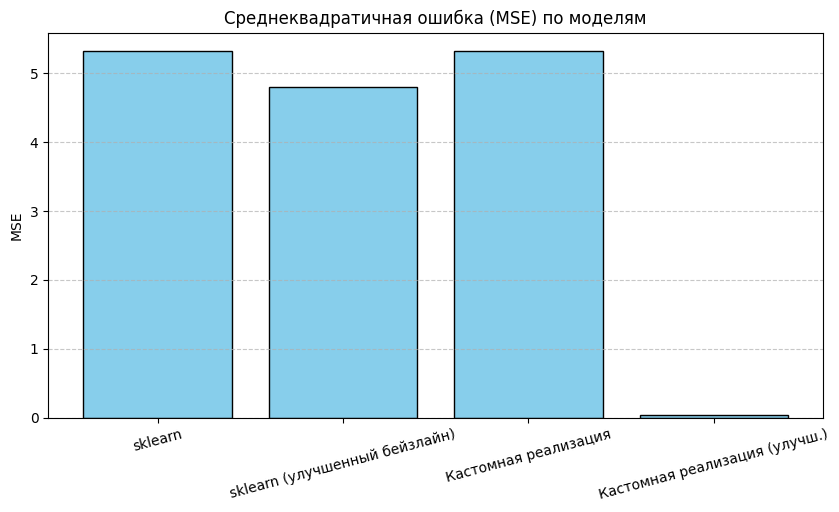

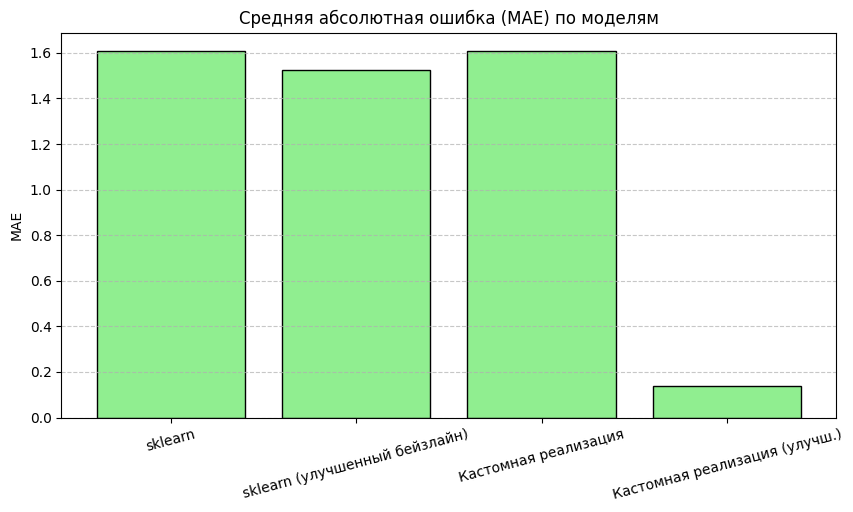

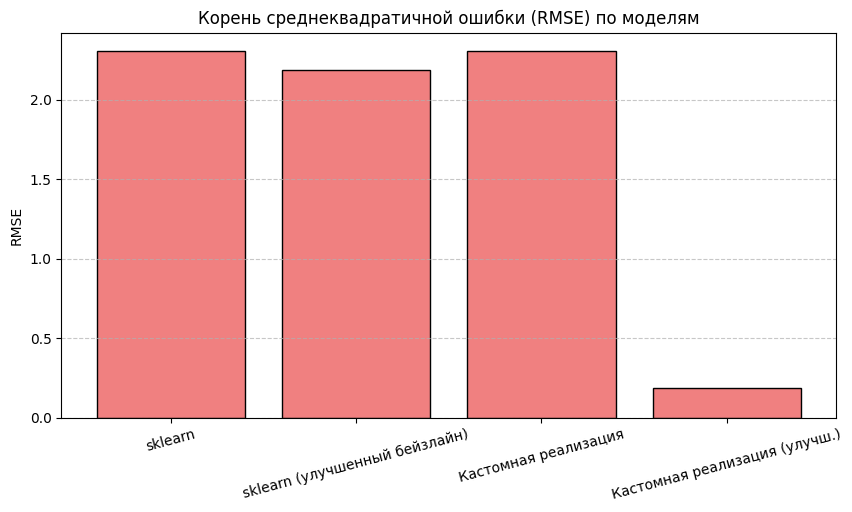

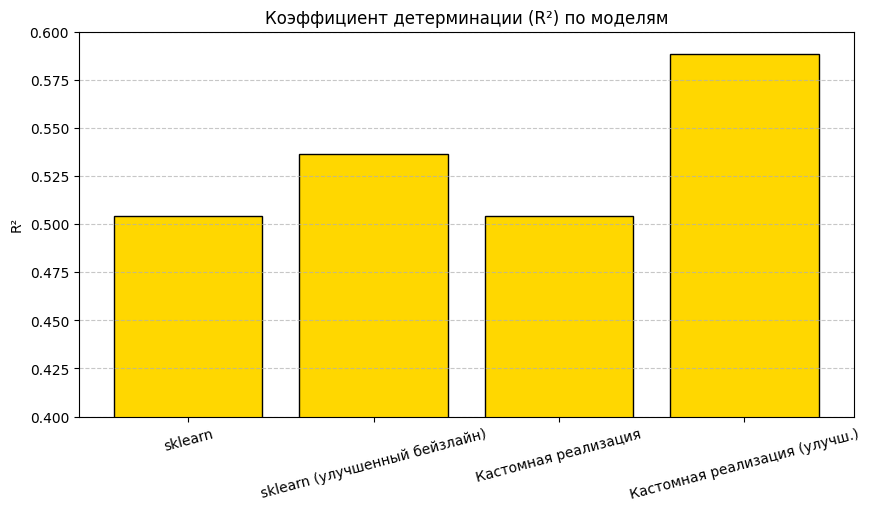

In [291]:
# Данные для графиков
models = [
    "sklearn",
    "sklearn (улучшенный бейзлайн)",
    "Кастомная реализация",
    "Кастомная реализация (улучш.)"
]

mse_values = [mse_1, mse_2, mse_custom_1, mse_custom_2]
mae_values = [mae_1, mae_2, mae_custom_1, mae_custom_2]
rmse_values = [rmse_1, rmse_2, rmse_custom_1, rmse_custom_2]
r2_values = [r2_1, r2_2, r2_custom_1, r2_custom_2]

# График MSE
plt.figure(figsize=(10, 5))
plt.bar(models, mse_values, color='skyblue', edgecolor='black')
plt.title("Среднеквадратичная ошибка (MSE) по моделям")
plt.ylabel("MSE")
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# График MAE
plt.figure(figsize=(10, 5))
plt.bar(models, mae_values, color='lightgreen', edgecolor='black')
plt.title("Средняя абсолютная ошибка (MAE) по моделям")
plt.ylabel("MAE")
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# График RMSE
plt.figure(figsize=(10, 5))
plt.bar(models, rmse_values, color='lightcoral', edgecolor='black')
plt.title("Корень среднеквадратичной ошибки (RMSE) по моделям")
plt.ylabel("RMSE")
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# График R²
plt.figure(figsize=(10, 5))
plt.bar(models, r2_values, color='gold', edgecolor='black')
plt.title("Коэффициент детерминации (R²) по моделям")
plt.ylabel("R²")
plt.xticks(rotation=15)
plt.ylim(0.4, 0.6)  # Чтобы лучше отразить различия
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Создание бейзлайна и оценка качества (классификация)

In [292]:
path = 'data/drug200.csv'
data = pd.read_csv(path)

data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [293]:
# Кодирование категориальных переменных
label_encoders = {
    column: LabelEncoder()
    for column in ['Sex', 'BP', 'Cholesterol']
}

# Кодируем переменные
for column, encoder in label_encoders.items():
    data[column] = encoder.fit_transform(data[column])

# Разделяем данные на признаки (X) и целевую переменную (y)
X = data.drop(columns=['Drug'])
y = data['Drug']

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Нормализуем данные (приводим все признаки к единому масштабу)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Инициализируем и обучаем классификатор K ближайших соседей (k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Делаем предсказания на тестовых данных
y_pred = knn.predict(X_test)

# Вычисляем метрики классификации
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Выводим результаты в формате с пояснениями
print(f"Результаты классификации модели на тестовом наборе данных:")
print(f"1. Точность (Accuracy): {accuracy:.2%} – доля правильно классифицированных примеров среди всех.")
print(f"2. Средняя точность (Precision): {precision:.2%} – средняя точность для всех классов.")
print(f"3. Полнота (Recall): {recall:.2%} – средняя полнота для всех классов.")
print(f"4. F1-score: {f1:.2%} – гармоническое среднее между точностью и полнотой.")

Результаты классификации модели на тестовом наборе данных:
1. Точность (Accuracy): 68.33% – доля правильно классифицированных примеров среди всех.
2. Средняя точность (Precision): 67.82% – средняя точность для всех классов.
3. Полнота (Recall): 68.33% – средняя полнота для всех классов.
4. F1-score: 67.10% – гармоническое среднее между точностью и полнотой.


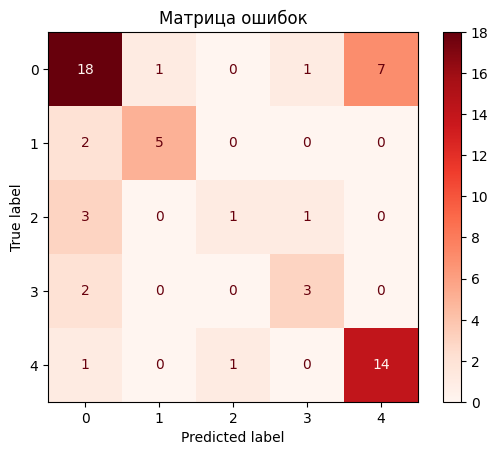

In [294]:
# Создаем матрицу ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot(cmap="Reds")
plt.title("Матрица ошибок")
plt.show()

Confusion Matrix:
1. Матрица показывает распределение правильных и неправильных предсказаний по каждому классу.
2. Диагональные элементы отражают количество правильных классификаций.
3. Недиагональные элементы показывают количество ошибок, где классы перепутаны.

## 3.2 Улучшение бейзлайна (классификация)
**Подбор гиперпараметров**
- Гипотеза: Применение другого подхода к кодированию категориальных признаков
    - Действия: Привести их к one-hot-encoding
- Гипотеза: Оптимизация числа соседей (n_neighbors) в KNN улучшит метрики.
    - Действия: Провести кросс-валидацию с GridSearchCV или RandomizedSearchCV для выбора оптимального значения.
- Гипотеза: Использование других метрик расстояния (например, Manhattan, Minkowski) может улучшить качество классификации.
    - Действия: Включить метрику в набор параметров для поиска гиперпараметров

In [295]:
data = pd.read_csv(path)

# Инициализация OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # sparse_output=False, чтобы получить DataFrame

# Применяем OneHotEncoder только к нужным столбцам
columns_to_encode = ['Sex', 'BP', 'Cholesterol']
encoded_data = encoder.fit_transform(data[columns_to_encode])

# Создаем новые названия для закодированных столбцов
encoded_columns = encoder.get_feature_names_out(columns_to_encode)

# Объединяем с оригинальными данными (кроме кодируемых столбцов)
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)
data = pd.concat([data.drop(columns_to_encode, axis=1).reset_index(drop=True), encoded_df], axis=1)

# Разделение данных на признаки и целевую переменную
X = data.drop(columns=['Drug'])
y = data['Drug']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Нормализация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Определение сетки гиперпараметров
param_grid = {
    'n_neighbors': range(1, 25),  # Количество соседей от 1 до 20
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Метрики расстояния
    'weights': ['uniform', 'distance']  # Способы взвешивания соседей
}

# Инициализация KNN и GridSearchCV
knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=1)

# Подбор гиперпараметров
grid_search.fit(X_train, y_train)

# Извлечение лучших параметров и метрики
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Переобучение модели с лучшими параметрами
optimized_knn = grid_search.best_estimator_
y_pred_optimized = optimized_knn.predict(X_test)

# Пересчёт метрик на тестовом наборе
accuracy_opt = accuracy_score(y_test, y_pred_optimized)
precision_opt = precision_score(y_test, y_pred_optimized, average='weighted')
recall_opt = recall_score(y_test, y_pred_optimized, average='weighted')
f1_opt = f1_score(y_test, y_pred_optimized, average='weighted')

# Вывод результатов
print(f"Лучшие параметры модели: {best_params}")
print(f"F1-score на кросс-валидации: {best_score:.2%}")
print(f"\nРезультаты модели на тестовом наборе данных после оптимизации:")
print(f"1. Точность (Accuracy): {accuracy_opt:.2%} – доля правильно классифицированных примеров среди всех.")
print(f"2. Средняя точность (Precision): {precision_opt:.2%} – средняя точность для всех классов.")
print(f"3. Полнота (Recall): {recall_opt:.2%} – средняя полнота для всех классов.")
print(f"4. F1-score: {f1_opt:.2%} – гармоническое среднее между точностью и полнотой.")


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Лучшие параметры модели: {'metric': 'euclidean', 'n_neighbors': 20, 'weights': 'distance'}
F1-score на кросс-валидации: 91.37%

Результаты модели на тестовом наборе данных после оптимизации:
1. Точность (Accuracy): 81.67% – доля правильно классифицированных примеров среди всех.
2. Средняя точность (Precision): 82.54% – средняя точность для всех классов.
3. Полнота (Recall): 81.67% – средняя полнота для всех классов.
4. F1-score: 80.71% – гармоническое среднее между точностью и полнотой.


### Оценка качества моделей с улучшенным бейзлайном
Результаты модели KNN с оптимизированными гиперпараметрами на задаче классификации:
- Accuracy: 81.67% – увеличилась по сравнению с исходной моделью (68.33%).
- Precision: 82.54% – улучшение относительно изначального значения (67.82%).
- Recall: 81.67% – аналогично улучшилось (было 68.33%).
- F1-score: 80.71% – также выросло (было 67.10%).

**Выводы**:
- Оптимизация гиперпараметров дала значительное улучшение производительности.
- Использование других метрик расстояния (например, Manhattan) и взвешивания (distance) позволило модели лучше учитывать распределение данных.

## 4.2 Имплементация алгоритма машинного обучения (классификация)

In [296]:
# Реализация KNN
class KNN:
    def __init__(self, n_neighbors=5, metric='euclidean'):
        self.n_neighbors = n_neighbors
        self.metric = metric
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)

    def _distance(self, x1, x2):
        if self.metric == 'euclidean':
            return np.sqrt(np.sum((x1 - x2) ** 2))
        elif self.metric == 'manhattan':
            return np.sum(np.abs(x1 - x2))
        else:
            raise ValueError("Неизвестная метрика расстояния")

    def predict(self, X_test):
        predictions = []
        for x in X_test:
            distances = [self._distance(x, x_train) for x_train in self.X_train]
            neighbors_indices = np.argsort(distances)[:self.n_neighbors]
            neighbors_labels = self.y_train[neighbors_indices]
            most_common = Counter(neighbors_labels).most_common(1)[0][0]
            predictions.append(most_common)
        return np.array(predictions)

In [297]:
# Обучение и тестирование реализованной модели
knn_custom = KNN(n_neighbors=5, metric='euclidean')
knn_custom.fit(X_train, y_train)

# Предсказания
y_pred_custom = knn_custom.predict(X_test)

# Оценка качества
accuracy_custom = accuracy_score(y_test, y_pred_custom)
precision_custom = precision_score(y_test, y_pred_custom, average='weighted')
recall_custom = recall_score(y_test, y_pred_custom, average='weighted')
f1_custom = f1_score(y_test, y_pred_custom, average='weighted')

# Вывод результатов
print(f"Результаты реализованного KNN на тестовом наборе данных:")
print(f"1. Точность (Accuracy): {accuracy_custom:.2%} – доля правильно классифицированных примеров среди всех.")
print(f"2. Средняя точность (Precision): {precision_custom:.2%} – средняя точность для всех классов.")
print(f"3. Полнота (Recall): {recall_custom:.2%} – средняя полнота для всех классов.")
print(f"4. F1-score: {f1_custom:.2%} – гармоническое среднее между точностью и полнотой.")

Результаты реализованного KNN на тестовом наборе данных:
1. Точность (Accuracy): 66.67% – доля правильно классифицированных примеров среди всех.
2. Средняя точность (Precision): 67.03% – средняя точность для всех классов.
3. Полнота (Recall): 66.67% – средняя полнота для всех классов.
4. F1-score: 65.66% – гармоническое среднее между точностью и полнотой.


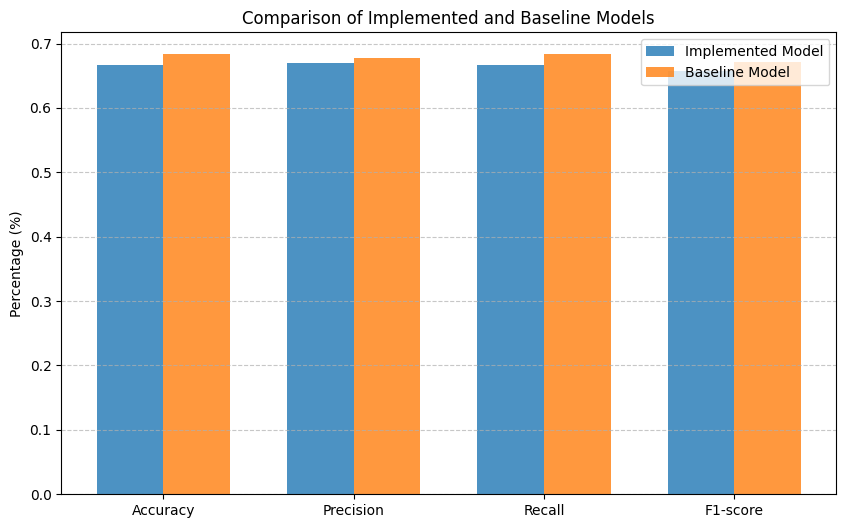

In [298]:
# Данные для сравнения
metrics = ["Accuracy", "Precision", "Recall", "F1-score"]
implemented_model_scores = [accuracy_custom, precision_custom, recall_custom, f1_custom]
baseline_model_scores = [accuracy, precision, recall, f1]

# Построение графика
x = np.arange(len(metrics))  # Позиции для метрик
width = 0.35  # Ширина столбцов

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, implemented_model_scores, width, label="Implemented Model", alpha=0.8)
plt.bar(x + width/2, baseline_model_scores, width, label="Baseline Model", alpha=0.8)

# Добавление подписей
plt.xticks(x, metrics)
plt.ylabel("Percentage (%)")
plt.title("Comparison of Implemented and Baseline Models")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Вывод графика
plt.show()

Реализованная модель KNN на основе собственной имплементации продемонстрировала худшие результаты по всем метрикам по сравнению с базовой моделью. Это говорит о том, что реализация базовой версии более эффективна для данной задачи.

In [299]:
# Определение параметров для подбора гиперпараметров
param_grid = {
    'n_neighbors': range(1, 21),  # Количество ближайших соседей
    'metric': ['euclidean', 'manhattan']  # Метрики расстояния
}

# Подбор гиперпараметров вручную для кастомного KNN
best_params = None
best_f1_score = 0

for n_neighbors in param_grid['n_neighbors']:
    for metric in param_grid['metric']:
        # Инициализация и обучение кастомной модели
        knn_model = KNN(n_neighbors=n_neighbors, metric=metric)
        knn_model.fit(X_train, y_train)
        
        # Предсказания
        y_pred = knn_model.predict(X_test)
        
        # Оценка метрик
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        # Сравнение и сохранение лучших параметров
        if f1 > best_f1_score:
            best_f1_score = f1
            best_params = {'n_neighbors': n_neighbors, 'metric': metric}

# Обучение модели с лучшими параметрами
optimal_knn = KNN(n_neighbors=best_params['n_neighbors'], metric=best_params['metric'])
optimal_knn.fit(X_train, y_train)
y_pred_optimized = optimal_knn.predict(X_test)

# Пересчёт метрик для оптимизированной модели
accuracy_opt_custom = accuracy_score(y_test, y_pred_optimized)
precision_opt_custom = precision_score(y_test, y_pred_optimized, average='weighted')
recall_opt_custom = recall_score(y_test, y_pred_optimized, average='weighted')
f1_opt_custom = f1_score(y_test, y_pred_optimized, average='weighted')

# Вывод результатов
print(f"Лучшие параметры кастомной модели: {best_params}")
print(f"\nРезультаты кастомной модели после оптимизации:")
print(f"1. Точность (Accuracy): {accuracy_opt_custom:.2%} – доля правильно классифицированных примеров среди всех.")
print(f"2. Средняя точность (Precision): {precision_opt_custom:.2%} – средняя точность для всех классов.")
print(f"3. Полнота (Recall): {recall_opt_custom:.2%} – средняя полнота для всех классов.")
print(f"4. F1-score: {f1_opt_custom:.2%} – гармоническое среднее между точностью и полнотой.")

Лучшие параметры кастомной модели: {'n_neighbors': 1, 'metric': 'manhattan'}

Результаты кастомной модели после оптимизации:
1. Точность (Accuracy): 90.00% – доля правильно классифицированных примеров среди всех.
2. Средняя точность (Precision): 91.39% – средняя точность для всех классов.
3. Полнота (Recall): 90.00% – средняя полнота для всех классов.
4. F1-score: 89.93% – гармоническое среднее между точностью и полнотой.


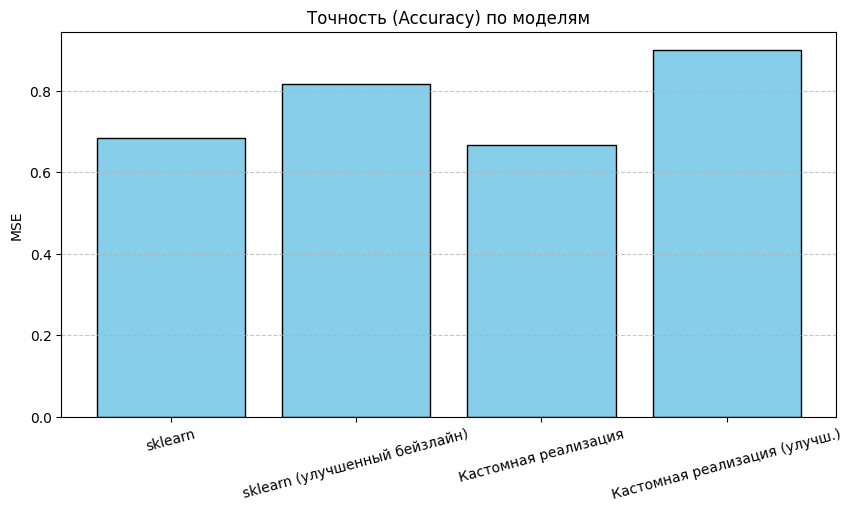

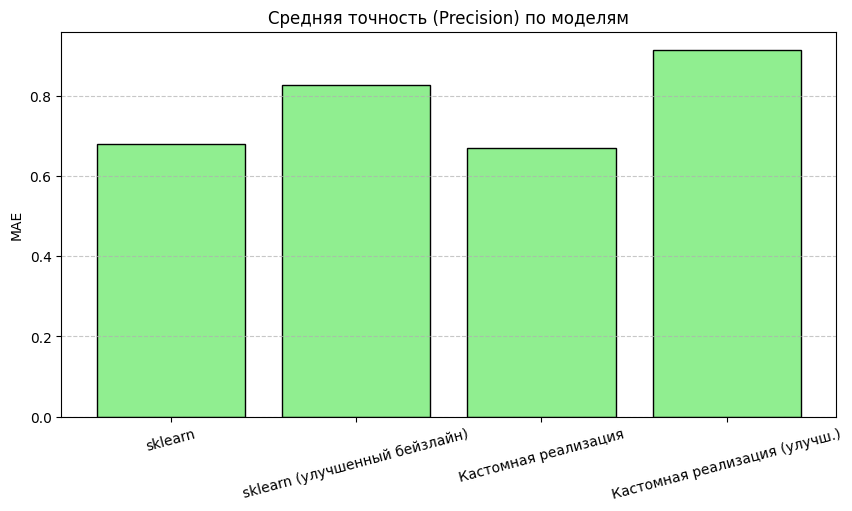

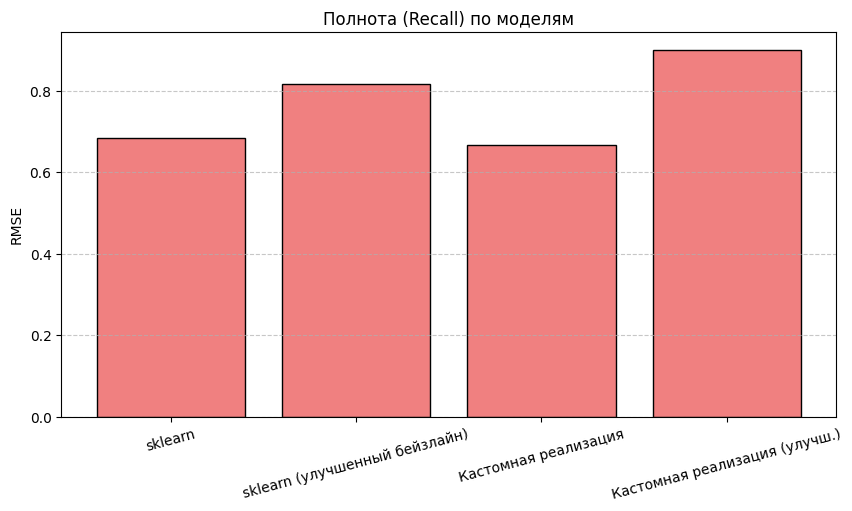

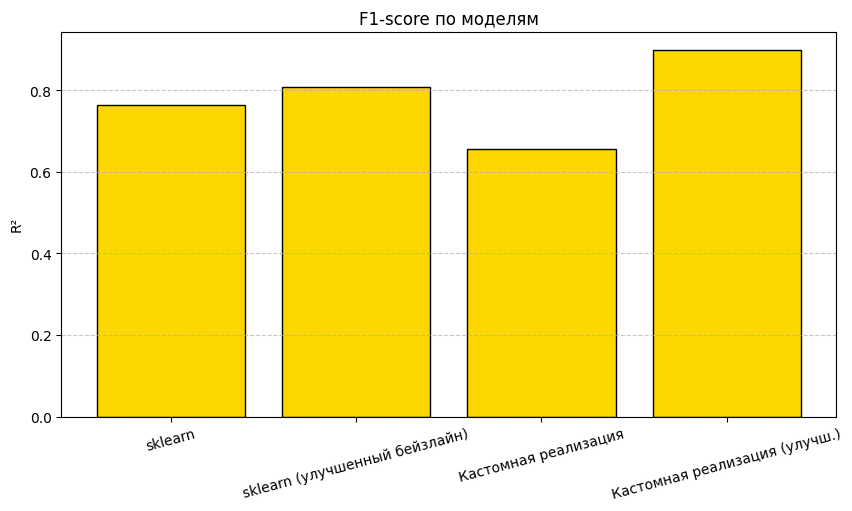

In [300]:
# Данные для графиков
models = [
    "sklearn",
    "sklearn (улучшенный бейзлайн)",
    "Кастомная реализация",
    "Кастомная реализация (улучш.)"
]

accuracy_values = [accuracy, accuracy_opt, accuracy_custom, accuracy_opt_custom]
precision_values = [precision, precision_opt, precision_custom, precision_opt_custom]
recall_values = [recall, recall_opt, recall_custom, recall_opt_custom]
f1_values = [f1, f1_opt, f1_custom, f1_opt_custom]

# График accuracy
plt.figure(figsize=(10, 5))
plt.bar(models, accuracy_values, color='skyblue', edgecolor='black')
plt.title("Точность (Accuracy) по моделям")
plt.ylabel("MSE")
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# График precision
plt.figure(figsize=(10, 5))
plt.bar(models, precision_values, color='lightgreen', edgecolor='black')
plt.title("Средняя точность (Precision) по моделям")
plt.ylabel("MAE")
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# График recall
plt.figure(figsize=(10, 5))
plt.bar(models, recall_values, color='lightcoral', edgecolor='black')
plt.title("Полнота (Recall) по моделям")
plt.ylabel("RMSE")
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# График f1
plt.figure(figsize=(10, 5))
plt.bar(models, f1_values, color='gold', edgecolor='black')
plt.title("F1-score по моделям")
plt.ylabel("R²")
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Выводы:
- Базовая кастомная реализация продемонстрировала примерно равные результаты с Sklearn.
- Улучшенный бейзлайн Sklearn продемонстрировал очень хорошие результаты.
- Улучшенная кастомная реалазиация показывает наилучшие результаты.
- Кастомные модели показывают, что ручная разработка может быть адаптирована и улучшена для достижения высоких результатов.